In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Thu Mar 31 16:19:36 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
from fastai.text import *


In [4]:
import os
%tensorflow_version 2.x

import tensorflow as tf
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.8.0
Found GPU at: /device:GPU:0


In [5]:
import pandas as pd
import numpy as np


In [6]:
df=pd.read_csv("/content/drive/MyDrive/SHL-ASSIGNMENT/Dataset/train_data.csv")
df.sample(10)


,input,labels
12627,I was told that this February a Taiwanese stud...,0
17462,today is my first day on this website .,1
12596,And what should I do my master thesis ?,0
4792,And she invited me to go to the cinema . Of co...,1
14764,Gender is not a level of super mentality .,0
4435,Luckily we did not get hurt but my friend drop...,0
18164,Pasta is the easy answer for my everyday power...,1
8282,"This seminar , which will pay special attenti...",1
7632,I am thinking I will do the my room cleaning .,0
13016,"To conclude , Mr .",0


In [7]:
from sklearn.model_selection import train_test_split
train_sentences = df.input
train_labels = df.labels
train_set = pd.concat([train_labels,train_sentences], axis=1)
new_train_set, new_val_set= train_test_split(train_set,test_size=0.10,shuffle=False)

In [8]:
df = pd.read_csv("/content/drive/MyDrive/SHL-ASSIGNMENT/Dataset/val_data.csv")
test_sentences = df.input
test_labels = df.labels
new_test_set = pd.concat([test_labels,test_sentences], axis=1)
new_val_set

,labels,input
17998,0,I am looking forward to hearing the result in ...
17999,0,Start studying English
18000,0,Maybe You Can help me ?
18001,1,"Understanding , cooperation , and tolerance ."
18002,0,degrees at AM .
...,...,...
19993,1,More than a hundred thousand people are suppor...
19994,1,The reason why we chose this subject a few day...
19995,1,When you buy CBS is Criminal Minds DVD in Japa...
19996,1,but it is dizzying for me T T


In [9]:

path = "/content/drive/MyDrive/SHL-ASSIGNMENT/Dataset"
data_lm = TextLMDataBunch.from_df(path,train_df=new_train_set,valid_df= new_val_set ,label_cols='labels',text_cols='input')
data_clas = TextClasDataBunch.from_df(path,train_df=new_train_set,valid_df= new_val_set, vocab=data_lm.train_ds.vocab,label_cols='labels',text_cols='input', bs=32)
data_lm.train_ds.vocab

/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(a, dtype=dtype, **kwargs)


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [10]:
print('getcwd:', os.getcwd())


getcwd: /content


In [11]:
data_lm.save('/content/drive/MyDrive/SHL-ASSIGNMENT/data_lm_export.pkl')
data_clas.save('/content/drive/MyDrive/SHL-ASSIGNMENT/data_clas_export.pkl')

In [12]:
bs=32
data_lm = load_data('/content/drive/MyDrive/SHL-ASSIGNMENT', 'data_lm_export.pkl', bs=bs)
data_clas = load_data('/content/drive/MyDrive/SHL-ASSIGNMENT', 'data_clas_export.pkl', bs=bs)

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [13]:
len(data_clas.vocab.itos) == len(data_lm.vocab.itos)

True

In [14]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
"xxbos i feel it very difficult to write by english , it take me a lot of time to write a complete sentence in english and i do not have enough patient so i have given up a lot of times and i know if i continue doing like that i will never use english fluently in my like , i ca not talk with foreign people because i do",0
"xxbos xxmaj in xxmaj taiwan folk custom , no matter incense , cigarettes , incense xxunk , each of them contains a grateful though , a hope , and protection of xxmaj xxunk for people , the deeper meaning is xxmaj chinese people have great respect for nature and xxunk to our ancestors , xxmaj if you are a flower xxunk in xxmaj taiwan , you want your xxunk become",0
"xxbos xxmaj hello , i am xxmaj xxunk from xxmaj malaysia . i xxunk need to improve my xxmaj english shortly because xxmaj english is a major communication tool in my current working environment and i found my xxmaj english was not good enough and could not totally understand anyone . i feel frustrated and hopeless , so please help me , thank you so much !",1
"xxbos xxmaj however , i inferred that she was afraid that she could not complete her mission without trouble , because what she had was just one piece of paper that described a hand - wrote map to the customer is office which is more than a hundred miles away from our office , and a contact person is name .",1
"xxbos xxmaj however , i inferred that she was afraid that she could complete her mission without troubles , because what she had is just one piece of paper that described hand - wrote map to the customer is office that is more than a hundred miles far from our office , and contact person name .",0


In [15]:
torch.cuda.set_device(0)


In [16]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.33)


In [17]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


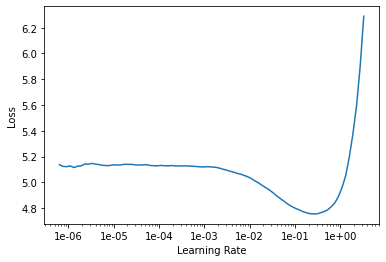

In [18]:
learn.recorder.plot()


In [19]:
learn.fit_one_cycle(3,1e-01)


epoch,train_loss,valid_loss,accuracy,time
0,4.235349,4.068464,0.301477,00:09
1,3.909034,3.780921,0.320261,00:09
2,3.255346,3.610412,0.338015,00:09


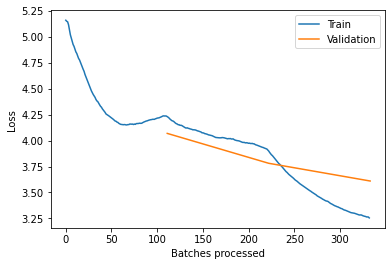

In [20]:
learn.recorder.plot_losses()

In [21]:
learn.save("/content/drive/MyDrive/SHL-ASSIGNMENT/language_model", return_path=True)

PosixPath('/content/drive/MyDrive/SHL-ASSIGNMENT/language_model.pth')

In [22]:
learn.save_encoder('/content/drive/MyDrive/SHL-ASSIGNMENT/language_model_encoder')



In [23]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5,metrics=accuracy)
learn.load_encoder('/content/drive/MyDrive/SHL-ASSIGNMENT/language_model_encoder')
learn.freeze()

In [24]:
data_clas.show_batch()

/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


text,target
"xxbos i feel it very difficult to write by english , it take me a lot of time to write a complete sentence in english and i do not have enough patient so i have given up a lot of times and i know if i continue doing like that i will never use english fluently in my like , i ca not talk with foreign people because i do",0
"xxbos xxmaj when you have xxunk of xxunk things to do , when , seeing your xxunk look because of your xxunk to finish in time all your multiple errands , your colleagues answer you with a look in which the only question can be seen through xxmaj life , is it easy for anyone in this world ? , when , throughout all day at work your free will",1
"xxbos i wondered why she did not invite her best friend xxmaj bio . xxmaj and i said , xxmaj that is xxup ok , if it is just to come to school early . xxmaj after that , she said , xxmaj oh , i remember that i have no time to come to school early , because i have something i must do before i go to school",1
"xxbos xxmaj when i was in junior high , one girl who was not my classmate came up to me and said , xxmaj are you gay ? i could not understand what she said at first but i replied , xxmaj well i have a sister so you might feel so . xxmaj this is not an answer at all but i managed to say that .",1
"xxbos xxmaj hi , i am a student for product design is master degree , and i have xxunk a work i call it xxmaj finger xxmaj dance , which is a kind of digital communication equipment for cold xxunk , and be suitable for outdoor survival and xxunk in the ice - disaster or snowstorm .",0


In [25]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


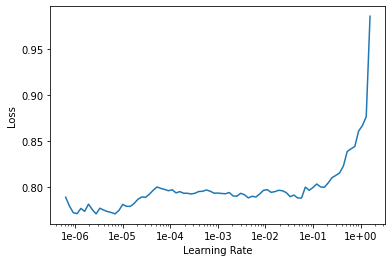

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(5, 1e-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.798372,0.756488,0.494000,00:11
1,0.795328,0.742009,0.493500,00:08
2,0.789606,0.739922,0.492000,00:09
3,0.785059,0.741585,0.493500,00:08
4,0.773447,0.731962,0.493500,00:09


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [28]:
learn.freeze_to(-1)


In [29]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


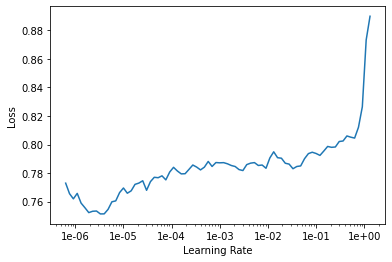

In [30]:
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(5, slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.697129,0.697354,0.519000,00:08
1,0.700698,0.707519,0.508500,00:09
2,0.694989,0.694141,0.509500,00:09
3,0.694880,0.692443,0.513000,00:09
4,0.695065,0.694138,0.492500,00:08
5,0.692560,0.691412,0.518500,00:08
6,0.693311,0.690991,0.534500,00:09
7,0.692992,0.690749,0.525500,00:09
8,0.691633,0.689923,0.541500,00:08
9,0.690112,0.689947,0.539500,00:09


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [32]:
learn.freeze_to(-2)
learn.fit_one_cycle(3, slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.694348,0.690421,0.538000,00:10
1,0.693690,0.690735,0.534500,00:10
2,0.691432,0.690308,0.541000,00:10


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [33]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


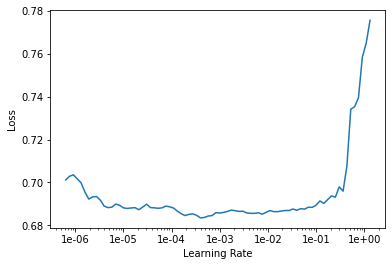

In [34]:
learn.recorder.plot()

In [35]:
learn.unfreeze()
learn.fit_one_cycle(5, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.683250,0.689951,0.536000,00:23
1,0.685016,0.690521,0.540000,00:24
2,0.687121,0.691374,0.540000,00:22
3,0.684972,0.690919,0.540000,00:23
4,0.685524,0.690842,0.542000,00:21


/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sort_idx = np.concatenate(np.random.permutation(ck_idx[1:])) if len(ck_idx) > 1 else np.array([],dtype=np.int)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/fastai/text/data.py:124: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must

In [36]:
learn.predict(' It has not completed it yet . 	 ')


(Category tensor(0), tensor(0), tensor([0.6493, 0.3507]))

In [37]:
learn.predict('How many hours per day do I study ?')

(Category tensor(1), tensor(1), tensor([0.4714, 0.5286]))

In [49]:
preds,targs = learn.get_preds(ordered=True)
accuracy(preds,targs)

tensor(0.5420)

In [52]:
learn.export('/content/drive/MyDrive/SHL-ASSIGNMENT/models/model.pkl')


In [81]:
test=pd.read_csv("/content/drive/MyDrive/SHL-ASSIGNMENT/Dataset/test_data.csv")
test

,input
0,I believe they will master Japanese soon becau...
1,I am looking for it .
2,Apple is a round fruit with smooth and colorfu...
3,Let It Will Be Push .
4,I rode on this ship from Sendai .
...,...
9967,Lang is growing up and improving step by step !
9968,I was away from my housework for about days .
9969,The conflict is so serious .
9970,An apple is a round fruit with smooth and colo...


In [87]:

test_datalist = TextList.from_df(test, cols='input')



In [100]:

valid_preds, valid_label=learn.get_preds(ds_type=DatasetType.Valid, ordered=True)
valid_preds.shape

torch.Size([2000, 2])

In [98]:
labels

array([[0.462004, 0.537996],
       [0.494666, 0.505334],
       [0.488782, 0.511218],
       [0.534162, 0.465838],
       ...,
       [0.451876, 0.548124],
       [0.471373, 0.528627],
       [0.714153, 0.285847],
       [0.522717, 0.477283]], dtype=float32)

In [59]:
len(test)

9972

In [121]:

preds=[]
for i in range(0,5000):#len(test)):
  p = learn.predict(test.input[i])
  preds.append(str(p[1]))


In [122]:
preds

len(preds)

5000

In [123]:

preds1=[]
for i in range(5000,9972):#len(test)):
  p = learn.predict(test.input[i])
  preds1.append(str(p[1]))


In [125]:
preds1
len(preds1)

4972

In [127]:
labels= preds+preds1
len(labels)

9972

In [130]:
df1=pd.DataFrame(labels)
df1

,0
0,tensor(0)
1,tensor(0)
2,tensor(1)
3,tensor(0)
4,tensor(1)
...,...
9967,tensor(0)
9968,tensor(1)
9969,tensor(1)
9970,tensor(1)


In [137]:
#result=pd.merge(test,df1)
result=pd.concat([test, df1], axis=1)

In [138]:
result

,input,0
0,I believe they will master Japanese soon becau...,tensor(0)
1,I am looking for it .,tensor(0)
2,Apple is a round fruit with smooth and colorfu...,tensor(1)
3,Let It Will Be Push .,tensor(0)
4,I rode on this ship from Sendai .,tensor(1)
...,...,...
9967,Lang is growing up and improving step by step !,tensor(0)
9968,I was away from my housework for about days .,tensor(1)
9969,The conflict is so serious .,tensor(1)
9970,An apple is a round fruit with smooth and colo...,tensor(1)


In [120]:
preds,y, loss = learn.get_preds(with_loss=True)
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))
from sklearn.metrics import f1_score

The accuracy is 0.5419999957084656 %.


In [1]:
result.to_csv('Pratyush_Rukhaiyar_Submission.csv')

NameError: ignored